<a href="https://colab.research.google.com/github/syc113/syc113/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Elbow method

# Import Data We need

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris().data

# K-Means

In [20]:
sse = []    
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris)
    sse.append(km.inertia_)

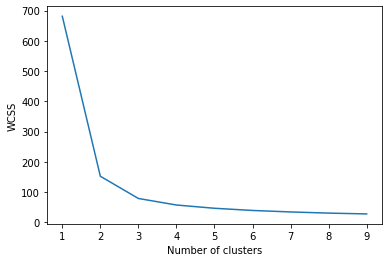

In [21]:
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(k_rng,sse)

# 2. PCA dimensional reduction

In [22]:
mnist = fetch_openml('mnist_784')

# devide dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.25, random_state=2)

# feature scaling

In [24]:
sc_X = StandardScaler()
sc_X.fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

# PCA

In [25]:
pca = PCA(n_components=0.80)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [26]:
X_train.shape

(52500, 784)

In [27]:
X_train_pca.shape

(52500, 146)

#dataset training

In [28]:
%%time
LR = LogisticRegression()
LR.fit(X_train, y_train)
score = LR.score(X_test, y_test)

CPU times: user 1min 20s, sys: 8.91 s, total: 1min 29s
Wall time: 48.6 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [29]:
score

0.9148

# pca dataset training

In [30]:
%%time
LR_pca = LogisticRegression()
LR_pca.fit(X_train_pca, y_train)
score = LR_pca.score(X_test_pca, y_test)

CPU times: user 19.3 s, sys: 6.22 s, total: 25.5 s
Wall time: 13.5 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
score

0.9204571428571429